In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']

<Axes: xlabel='Prediction', ylabel='count'>

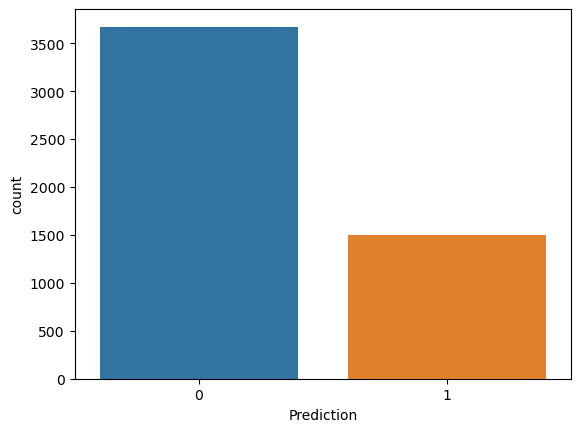

In [7]:
sns.countplot(x=y)

In [8]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

0.871616395978345
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



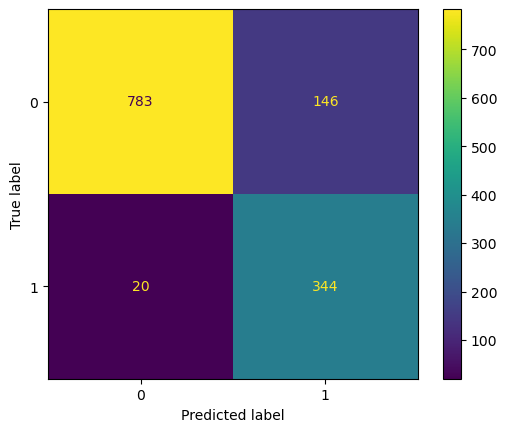

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [21]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred=svm.predict(x_test)

0.9450889404485692
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       929
           1       0.97      0.83      0.90       364

    accuracy                           0.95      1293
   macro avg       0.95      0.91      0.93      1293
weighted avg       0.95      0.95      0.94      1293



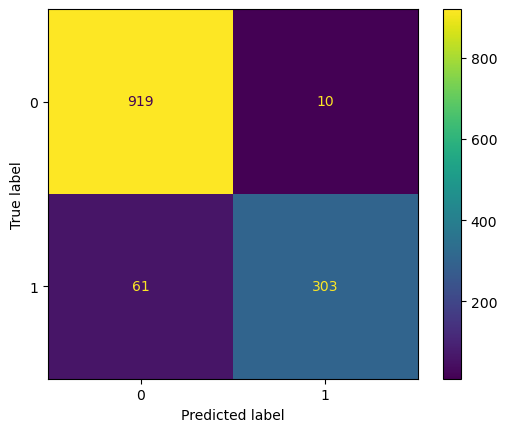

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))